# **Analiza azijskih letališč**
#### Projektna naloga iz analize podatkov pri predmetu Uvod v programiranje

<div class="alert alert-block alert-warning">
<b>Pomni:</b> Ta projektna naloga naj služi le informativnim namenom
</div>

***

Vsi podatke, ki jih bo ta analiza pokrivala (okvirno 11600), so bili vzeti iz spletne strani: __[ourairports.com](https://ourairports.com/continents/AS/airports.html)__ in widgeta spletne strani __[avionio.com](https://www.avionio.com)__. 
Podatke sem, s pomočjo `Acquiring_treasure.py`, shranil v csv datoteko, imenovano `Ogromna_tabela.csv`. 

Pred zajemom podatkov sem postavil nekaj hipotez, in vprašanj, na katera bomo skušali odgovoriti:
> * katere države imajo največ letališč
> * katere države imajo največ zaprtih letališč
> * katere države imajo največ prihodov skupaj
> * letališča z največ prihodi bodo uporabljala tudi največ letalskih družb
> * katera letališča bodo imela največjo in najmanjšo zamudo? Hipoteza: letališča z najmanj prihodi bodo imela največjo in najmanjšo povprečno zamudo.
> * katere so najpopularnejše letalske družbe v aziji


***

### Priprava

Najprej bomo uvozili knjižnico __Pandas__, s katero bomo izvedli analizo podatkov. Uvozili in prebrali bomo še datoteko s shranjenimi letališči `Ogromna_tabela.csv`. Za risanje nekaterih grafov bomo uporabili tudi knjižnico __matplotlib.pyplot__.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
#import Supporting_char as sup

pd.set_option("display.max_rows", 20)

In [3]:
letalisca = pd.read_csv("CSVing/Ogromna_tabela.csv")
letalisca

,Ime letališča,Država,Tip letališča,Število prihodov,Destinacije,Število destinacij,Letalske družbe,Število let. družb,Povprečna zamuda letov
0,Dubai International Airport,United Arab Emirates,Major airport,606,"['Abha', 'Accra', 'Addis Ababa', 'Ahmedabad', ...",206,"['AJet', 'AZAL Azerbaijan Airlines', 'Aegean A...",78,19 minut
1,Singapore Changi Airport,Singapore,Major airport,549,"['Abu Dhabi', 'Addis Ababa', 'Adelaide', 'Ahme...",128,"['ASIANA AIRLINES INC.', 'Aero Dili', 'AeroLog...",92,17 minut
2,Narita International Airport,Japan,Major airport,401,"['Abu Dhabi', 'Amami', 'Amsterdam', 'Anchorage...",105,"['ASIANA AIRLINES INC.', 'Aero K', 'Aero Mongo...",91,20 minut
3,Hong Kong International Airport,Hong Kong,Major airport,554,"['Abu Dhabi', 'Addis Ababa', 'Almaty', 'Amman'...",116,"['9 Air Co', 'ASIANA AIRLINES INC.', 'Aeroflot...",93,26 minut
4,Suvarnabhumi Airport,Thailand,Major airport,573,"['Abu Dhabi', 'Addis Ababa', 'Ahmedabad', 'Alm...",117,"['9 Air Co', 'ASIANA AIRLINES INC.', 'AeroLogi...",112,16 minut
...,...,...,...,...,...,...,...,...,...
11668,Guishan Dao Helipad,China,Heliport,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka
11669,Aden International Stadium Heliport,Yemen,Heliport,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka
11670,Ziyaret Border Post Heliport,Turkey,Heliport,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka
11671,Zugdidi Airport,Georgia,Closed airport,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka,Ni podatka


## Analiza podatkov

Najprej si oglejmo, katere države imajo največ letališč in katere največ letov, če združimo lete iz vseh letališč države.

In [4]:
po_drzavah = pd.read_csv("CSVing/Supporting.csv")
po_številu_letališč = po_drzavah.sort_values(by="Število letališč", ascending=False)
po_številu_letališč

,Država,Število letališč,Število prihodov
2,Japan,3565,3465
7,South Korea,1403,1329
13,Philippines,728,982
5,China,717,15406
8,India,626,3634
...,...,...,...
34,Macau,5,81
21,Greece,5,148
53,British Indian Ocean Territory,1,0
54,Christmas Island,1,0


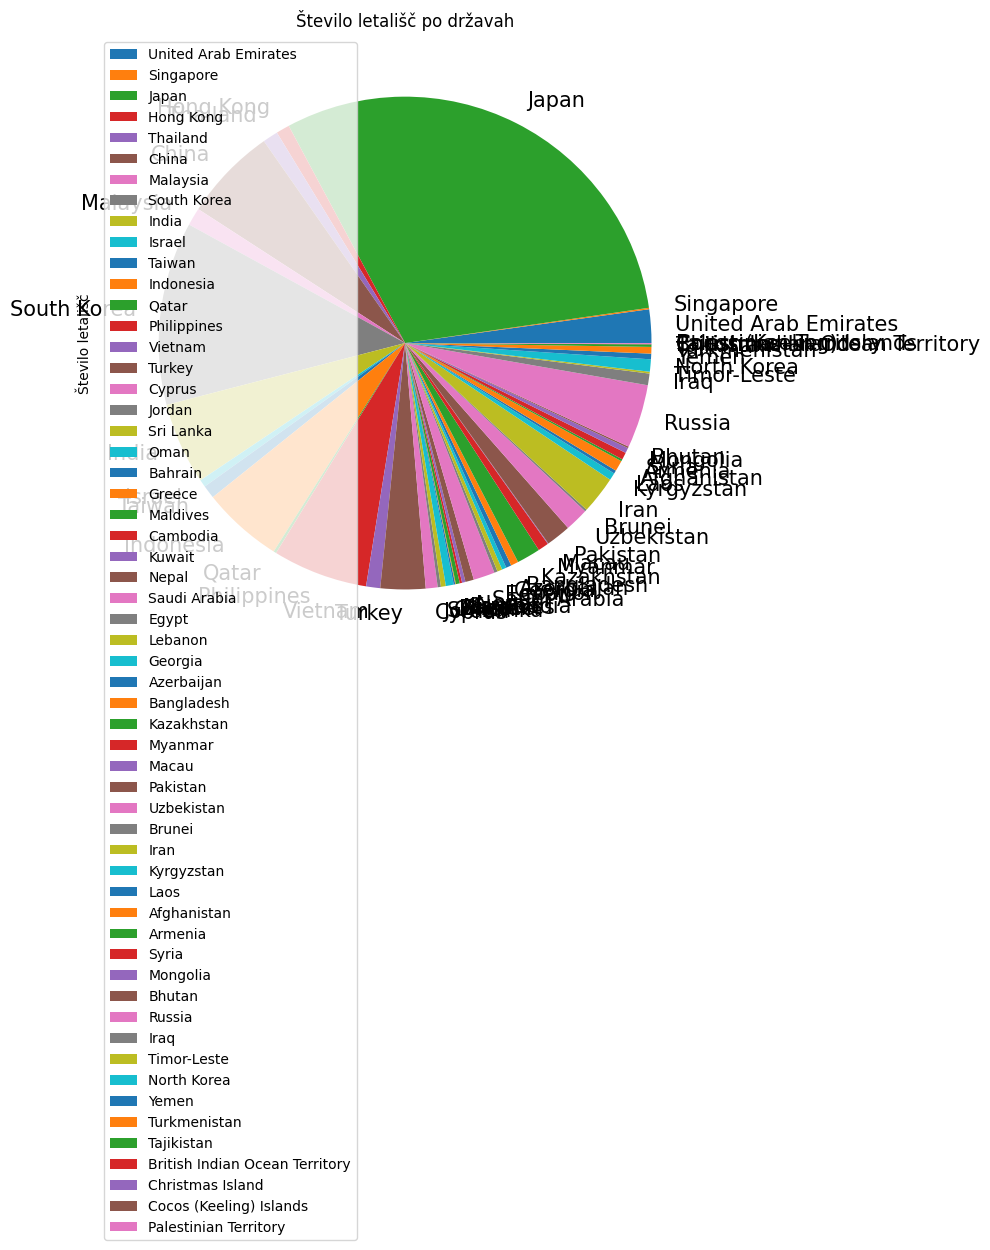

In [5]:
število_letališč = po_drzavah.set_index("Država").plot(kind='pie', figsize=(8, 8), fontsize=15, y="Število letališč", title="Število letališč po državah")

In [46]:
po_številu_prihodov = po_drzavah.sort_values(by="Število prihodov", ascending=False)
po_številu_prihodov

,Država,Število letališč,Število prihodov
5,China,717,15406
8,India,626,3634
2,Japan,3565,3465
11,Indonesia,618,2174
15,Turkey,344,1386
...,...,...,...
49,North Korea,94,0
53,British Indian Ocean Territory,1,0
54,Christmas Island,1,0
55,Cocos (Keeling) Islands,1,0


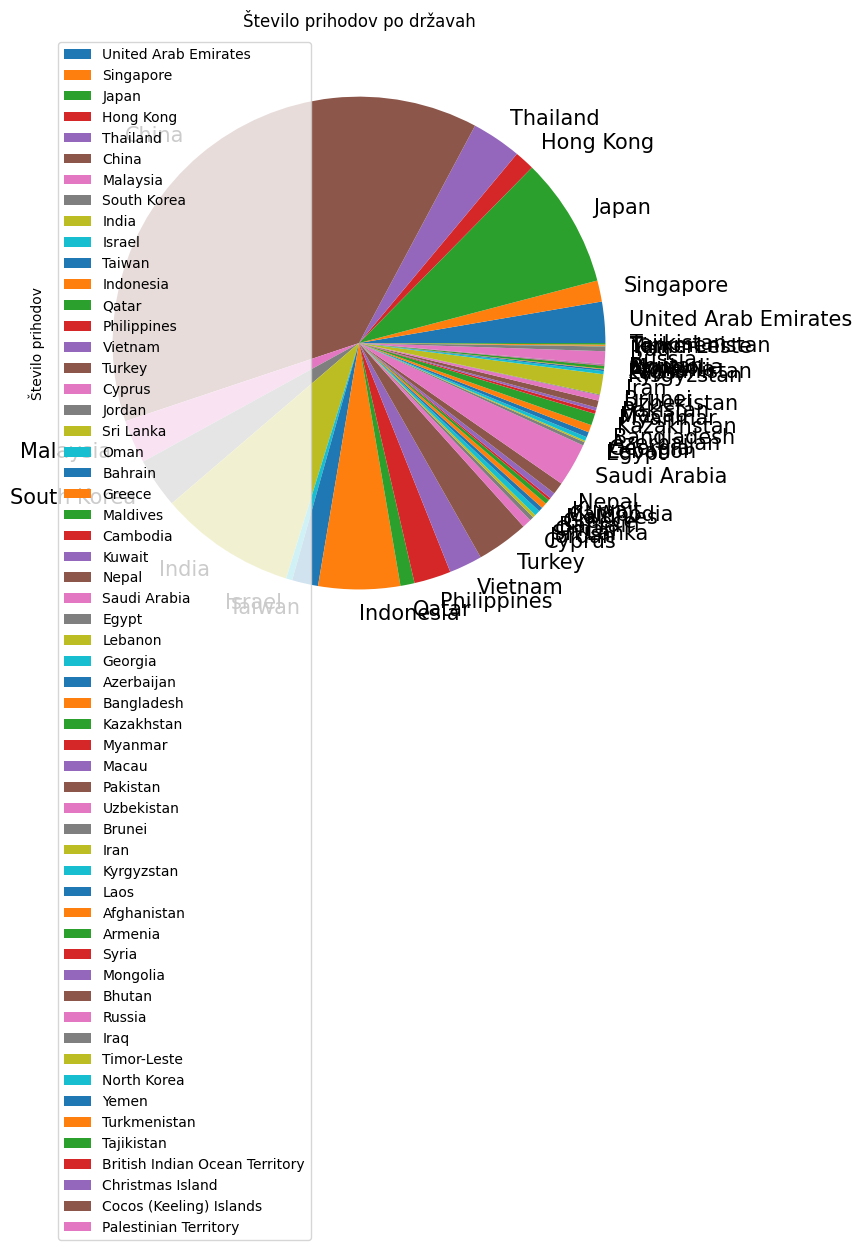

In [12]:
število_letov = po_drzavah.set_index("Država").plot(kind='pie', figsize=(8, 8), fontsize=15, y="Število prihodov", title="Število prihodov po državah")

Oglejmo si še, katere države imajo največ zaprtih letališč. Želimo izvedeti, ali ta tabela sovpada s prejšnjo.

In [47]:
zaprta_let = po_drzavah[["Država", "Tip letališča", "Število letališč"]]
filtrirana_zaprta = zaprta_let[zaprta_let["Tip letališča"] == "Closed airport"]
filtrirana_zaprta

#zaprta_letalisca = sup.st_zaprtih_letalisc(seznam)
#zaprtost_po_drzavah = pd.DataFrame(list(zaprta_letalisca.items()), columns=['Država', 'št_zaprtih_letališč']).sort_values(by="št_zaprtih_letališč")
#zaprtost_po_drzavah

KeyError: "['Tip letališča'] not in index"

Potovanja, ki vsebujejo nekakšno pot z letalom, se po navadi zavlečejo zaradi nepredvidene zamude leta. Velikokrat si letališča ne moremo izbirati na podlagi povprečne zamude, a si še vedno lahko pogledamo, katera letališča so prijazna potnikom in katera jim povzročajo gubasta čela.

In [43]:
zamude = letalisca[["Ime letališča", "Število prihodov", "Povprečna zamuda letov"]]
filtrirane_zamude = zamude[(zamude["Število prihodov"] != "Ni podatka") & (zamude["Povprečna zamuda letov"] != "Ni podatka")]
filtrirane_zamude['Zamuda_v_minutah'] = filtrirane_zamude['Povprečna zamuda letov'].str.extract(r'(\d+)').astype(int)
filtrirane_zamude.sort_values(by="Zamuda_v_minutah").drop(columns=['Zamuda_v_minutah'])

C:\Users\lanst\AppData\Local\Temp\ipykernel_37068\4093102284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrirane_zamude['Zamuda_v_minutah'] = filtrirane_zamude['Povprečna zamuda letov'].str.extract(r'(\d+)').astype(int)


,Ime letališča,Število prihodov,Povprečna zamuda letov
668,Hazrat Sultan International Airport,6,0 minut
442,Turaif Domestic Airport,1,1 minut
549,Zahedan International Airport,10,2 minut
662,Semey Airport,5,2 minut
687,Daşoguz Airport,4,3 minut
...,...,...,...
1772,Kadhdhoo Airport,4,63 minut
977,Villa Airport,3,65 minut
617,Barnaul Airport,7,65 minut
878,Korla Licheng Airport,38,69 minut


Zelo intuitivno bi bilo misliti, da bi imela letališča z največ prihodi tudi največje število letalskih družb. Pa je res tako?

In [44]:
let_druzbe = letalisca[["Ime letališča", "Število prihodov", "Število let. družb"]].sort_values(by="Število let. družb", ascending=False)
filtrirane = let_druzbe[let_druzbe["Število prihodov"] != "Ni podatka"]
filtrirane

,Ime letališča,Število prihodov,Število let. družb
3,Hong Kong International Airport,554,93
1,Singapore Changi Airport,549,92
2,Narita International Airport,401,91
7,Incheon International Airport,621,90
313,Komatsu Airport / JASDF Komatsu Air Base,23,9
...,...,...,...
1777,Kogalym International Airport,0,0
1935,Yulin Fumian Airport,0,0
886,Nowshahr Airport,0,0
427,Sukkur Airport,0,0


Poglejmo si korelacijo na bolj nazoren način

<Axes: title={'center': 'Število prihodov v odvisnosti od števila let. družb'}, xlabel='Število let. družb', ylabel='Število prihodov'>

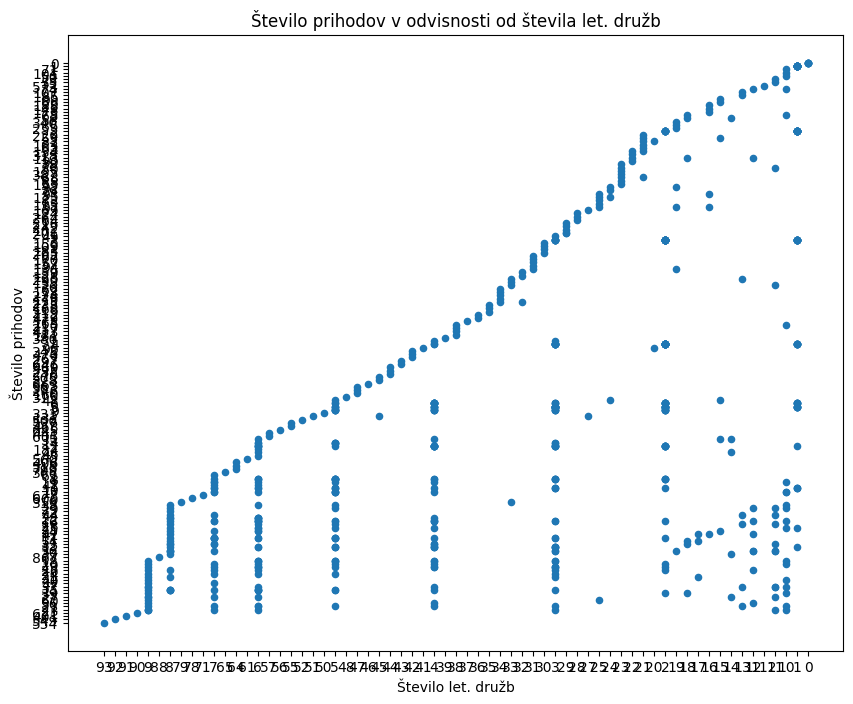

In [19]:
pikcasti_graf = filtrirane.plot.scatter("Število let. družb", "Število prihodov", figsize=(10, 8), title="Število prihodov v odvisnosti od števila let. družb")
pikcasti_graf

## Ugotovitve

Najprej se vrnimo na začetne hipoteze in vprašanja:
>* Največ letališč ima ___________
>* Največ zaprtih letališč ima ___________
>* Največ prihodov skupaj ima ___________
>* 

North Korea and Palestine